
####In this project, the main goal is to predict and analyze a real-world problem using machine learning. I used the California Housing Price dataset to train machine learning models, which includes various features. These features allow me to simulate and model the complex relationships within the data. In this project, regression methods have been applied to solve the problem.



### Load data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/drive/MyDrive/Datasets/housing.csv'

df = pd.read_csv(file_path)

df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Data analysis:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Plot

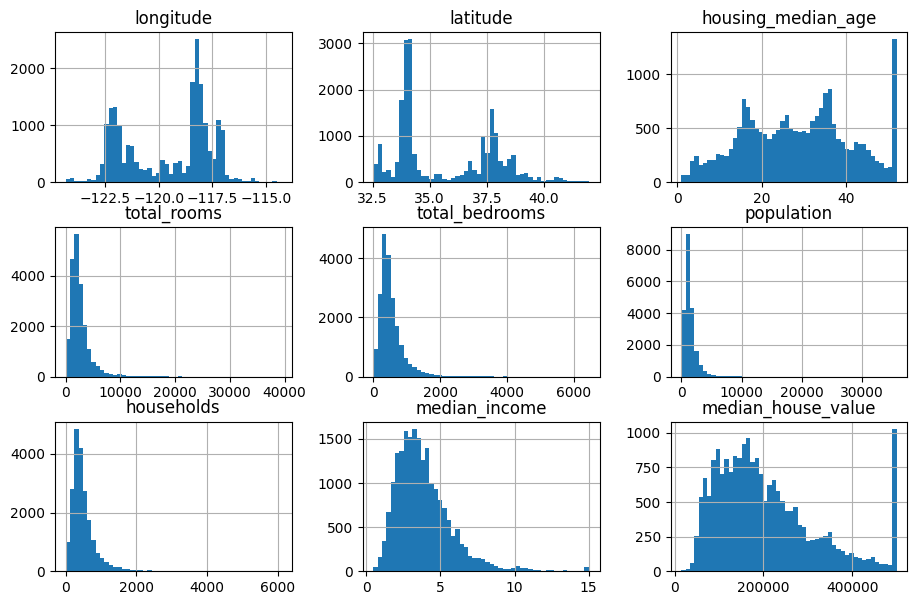

In [ ]:
df.hist(bins=50, figsize=(11,7))
plt.show()

### Train and Test set

In [ ]:
def shuffle_and_split_data(df, test_ratio):
  np.random.seed(42)
  random_indices = np.random.permutation(len(df))
  test_set_size= int(len(df)* test_ratio)
  test_random_indices=random_indices[:int(test_set_size)]
  train_random_indices=random_indices[int(test_set_size):]
  return df.iloc[train_random_indices], df.iloc[test_random_indices]

In [ ]:
shuffle_and_split_data(df, 0.2)[0]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN


In [ ]:
shuffle_and_split_data(df, 0.2)[1]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
15362,-117.22,33.36,16.0,3165.0,482.0,1351.0,452.0,4.6050,263300.0,<1H OCEAN
16623,-120.83,35.36,28.0,4323.0,886.0,1650.0,705.0,2.7266,266800.0,NEAR OCEAN
18086,-122.05,37.31,25.0,4111.0,538.0,1585.0,568.0,9.2298,500001.0,<1H OCEAN
2144,-119.76,36.77,36.0,2507.0,466.0,1227.0,474.0,2.7850,72300.0,INLAND


In [ ]:
from zlib import crc32

def is_identifier_in_test_set(identifier, test_ratio):
  return crc32(np.int64(identifier)) < test_ratio * 2**32

In [ ]:
def split_train_test_with_identifier_hash(df, test_ratio=0.2, identifier_column= "longitude"):
  identifiers = df[identifier_column]
  in_test_set = identifiers.apply(lambda id_: is_identifier_in_test_set(id_, test_ratio))
  return df.loc[~in_test_set], df.loc[in_test_set]

In [ ]:
split_train_test_with_identifier_hash(df.reset_index(), 0.2, "index")

(       index  longitude  latitude  housing_median_age  total_rooms  \
 0          0    -122.23     37.88                41.0        880.0   
 1          1    -122.22     37.86                21.0       7099.0   
 3          3    -122.25     37.85                52.0       1274.0   
 4          4    -122.25     37.85                52.0       1627.0   
 6          6    -122.25     37.84                52.0       2535.0   
 ...      ...        ...       ...                 ...          ...   
 20635  20635    -121.09     39.48                25.0       1665.0   
 20636  20636    -121.21     39.49                18.0        697.0   
 20637  20637    -121.22     39.43                17.0       2254.0   
 20638  20638    -121.32     39.43                18.0       1860.0   
 20639  20639    -121.24     39.37                16.0       2785.0   
 
        total_bedrooms  population  households  median_income  \
 0               129.0       322.0       126.0         8.3252   
 1              

In [ ]:
df.reset_index()["index"]

,index
0,0
1,1
2,2
3,3
4,4
...,...
20635,20635
20636,20636
20637,20637
20638,20638


In [ ]:
train_set, test_set = split_train_test_with_identifier_hash(df.reset_index(), 0.2, "index")
train_set

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
6,6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df_with_identifiers = df
df_with_identifiers["identifier"] = df["longitude"]*1000 + df["latitude"]
train_set, test_set = split_train_test_with_identifier_hash(df_with_identifiers, 0.2, "identifier")

In [ ]:
df_with_identifiers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [ ]:
train_set, test_set = split_train_test_with_identifier_hash(df_with_identifiers,
                                                            0.2,
                                                            "identifier")
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,-116997.29
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,-118126.23
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,-120445.34
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,-117077.31
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,-119763.22
...,...,...,...,...,...,...,...,...,...,...,...
11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN,-117926.22
11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND,-117395.98
5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN,-118345.97
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN,-121922.42


### Stratified Sampling:

In [ ]:
df["median_income"]

,median_income
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [ ]:
df["median_income_categories"]=pd.cut(df["median_income"], bins=[0,1.5,3.0,4.5,6.0,np.inf], labels=[1,2,3,4,5])
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,median_income_categories
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15,3
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57,2


<Axes: xlabel='median_income_categories'>

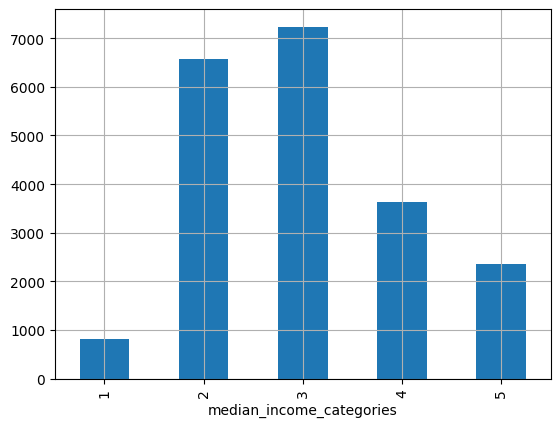

In [ ]:
df["median_income_categories"].value_counts().sort_index().plot.bar(grid = True)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=40)
stratified_split =[]
for train_i, test_i, in  sss.split(df, df["median_income_categories"]):
  stratified_train_set_n = df.iloc[train_i]
  stratified_test_set_n = df.iloc[test_i]
  stratified_split.append((stratified_train_set_n, stratified_test_set_n))

In [ ]:
stratified_split[0]

(       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 16415    -121.26     37.88                42.0        465.0            93.0   
 1279     -121.64     37.85                22.0       1999.0           415.0   
 7741     -118.15     33.95                35.0       2753.0           702.0   
 4425     -118.24     34.07                27.0        223.0            80.0   
 1283     -121.82     38.02                46.0        176.0            43.0   
 ...          ...       ...                 ...          ...             ...   
 1221     -120.65     38.28                21.0       3095.0           681.0   
 12640    -121.45     38.53                34.0       1893.0           415.0   
 5747     -118.27     34.17                48.0       1560.0           280.0   
 16224    -121.33     37.98                36.0       3113.0           576.0   
 8967     -118.40     34.00                37.0       1534.0           258.0   
 
        population  households  median

In [ ]:
str_train_set, str_test_set = train_test_split(df,
                                               test_size=0.2,
                                               stratify=df["median_income_categories"],
                                               random_state=40)

In [ ]:
str_train_set["median_income_categories"].value_counts()/len(str_train_set)

,count
median_income_categories,
3,0.350594
2,0.318859
4,0.176296
5,0.114462
1,0.039789


In [ ]:
str_train_set = str_train_set.drop("median_income_categories", axis=1)
str_test_set = str_test_set.drop("median_income_categories", axis=1)

In [ ]:
str_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,INLAND,-121222.12
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,INLAND,-121602.15
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,<1H OCEAN,-118116.05
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,<1H OCEAN,-118205.93
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,INLAND,-121781.98
...,...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,104000.0,INLAND,-120611.72
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,75400.0,INLAND,-121411.47
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,354700.0,<1H OCEAN,-118235.83
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,84600.0,INLAND,-121292.02


In [ ]:
str_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
5905,-118.42,34.29,34.0,1489.0,326.0,1389.0,313.0,3.4821,160300.0,<1H OCEAN,-118385.71
4830,-118.30,34.04,37.0,1470.0,399.0,1579.0,390.0,2.0060,150000.0,<1H OCEAN,-118265.96
10969,-117.87,33.76,37.0,4943.0,851.0,2164.0,788.0,4.1071,311300.0,<1H OCEAN,-117836.24
7048,-118.05,33.94,34.0,495.0,120.0,527.0,130.0,1.9453,149000.0,<1H OCEAN,-118016.06
13721,-117.18,34.07,7.0,1347.0,301.0,799.0,276.0,2.9485,112500.0,INLAND,-117145.93
...,...,...,...,...,...,...,...,...,...,...,...
3377,-118.29,34.25,19.0,1988.0,594.0,1399.0,527.0,2.4727,175000.0,<1H OCEAN,-118255.75
19816,-119.29,36.54,18.0,2581.0,628.0,2732.0,592.0,1.8429,58300.0,INLAND,-119253.46
20545,-121.75,38.55,26.0,4802.0,950.0,2199.0,939.0,3.7452,227700.0,INLAND,-121711.45
3330,-122.48,38.90,10.0,304.0,63.0,161.0,61.0,2.1964,112500.0,INLAND,-122441.10


### Visulization:


In [ ]:
train = str_train_set

<Axes: xlabel='longitude', ylabel='latitude'>

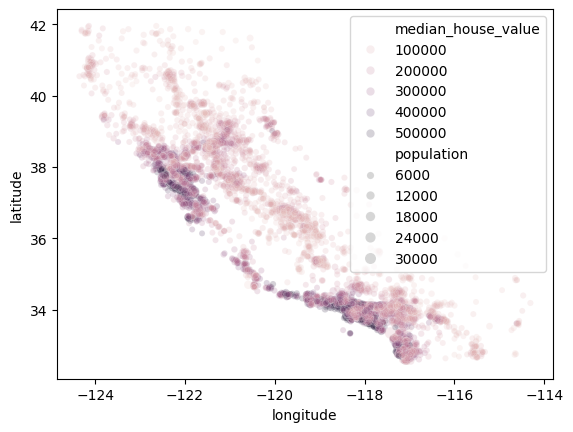

In [39]:
sns.scatterplot(x="longitude", y="latitude", data=train, size="population", alpha = 0.2,hue = "median_house_value")

### Correlation

In [45]:
train.dtypes


,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [48]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['ocean_proximity'] = encoder.fit_transform(train['ocean_proximity'])
train.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier
longitude,1.000000,-0.925744,-0.103618,0.041015,0.066820,0.096875,0.052258,-0.020808,-0.051167,-0.288933,1.000000
latitude,-0.925744,1.000000,0.006480,-0.032324,-0.064705,-0.106290,-0.068554,-0.072867,-0.137691,0.200600,-0.925591
housing_median_age,-0.103618,0.006480,1.000000,-0.361585,-0.320116,-0.291642,-0.302235,-0.122442,0.105329,0.108819,-0.103713
total_rooms,0.041015,-0.032324,-0.361585,1.000000,0.929260,0.854717,0.917051,0.200334,0.138007,-0.013566,0.041021
total_bedrooms,0.066820,-0.064705,-0.320116,0.929260,1.000000,0.875837,0.979742,-0.008368,0.052814,-0.011749,0.066817
population,0.096875,-0.106290,-0.291642,0.854717,0.875837,1.000000,0.905437,0.005458,-0.021544,-0.068017,0.096858
households,0.052258,-0.068554,-0.302235,0.917051,0.979742,0.905437,1.000000,0.013639,0.070014,-0.015544,0.052236
median_income,-0.020808,-0.072867,-0.122442,0.200334,-0.008368,0.005458,0.013639,1.000000,0.686865,-0.014783,-0.020906
median_house_value,-0.051167,-0.137691,0.105329,0.138007,0.052814,-0.021544,0.070014,0.686865,1.000000,0.081862,-0.051364
ocean_proximity,-0.288933,0.200600,0.108819,-0.013566,-0.011749,-0.068017,-0.015544,-0.014783,0.081862,1.000000,-0.289005


<Axes: xlabel='median_income', ylabel='median_house_value'>

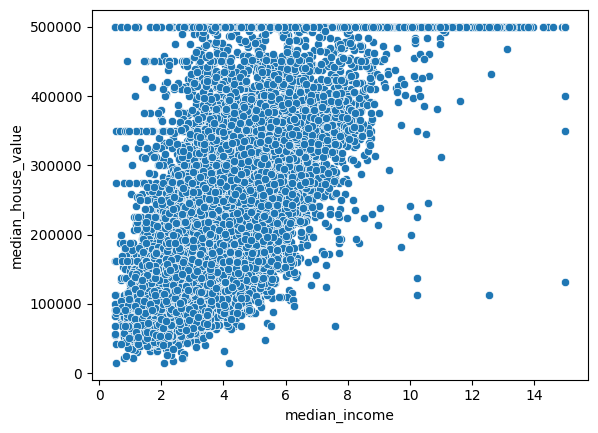

In [55]:
sns.scatterplot(x="median_income", y="median_house_value", data=train)

## Attribute combinations

In [57]:
train["rooms_per_household"] = train["total_rooms"]/train["households"]
train["bedrooms_per_room"] = train["total_bedrooms"]/train["total_rooms"]
train["population_per_household"] = train["population"]/train["households"]
train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,identifier,rooms_per_household,bedrooms_per_room,population_per_household
16415,-121.26,37.88,42.0,465.0,93.0,256.0,93.0,3.1719,158300.0,1,-121222.12,5.000000,0.200000,2.752688
1279,-121.64,37.85,22.0,1999.0,415.0,967.0,320.0,4.4583,253900.0,1,-121602.15,6.246875,0.207604,3.021875
7741,-118.15,33.95,35.0,2753.0,702.0,1592.0,614.0,2.7875,209000.0,0,-118116.05,4.483713,0.254995,2.592834
4425,-118.24,34.07,27.0,223.0,80.0,249.0,82.0,1.6136,137500.0,0,-118205.93,2.719512,0.358744,3.036585
1283,-121.82,38.02,46.0,176.0,43.0,101.0,40.0,2.2361,93800.0,1,-121781.98,4.400000,0.244318,2.525000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,-120.65,38.28,21.0,3095.0,681.0,1341.0,546.0,2.1382,104000.0,1,-120611.72,5.668498,0.220032,2.456044
12640,-121.45,38.53,34.0,1893.0,415.0,884.0,395.0,2.1679,75400.0,1,-121411.47,4.792405,0.219229,2.237975
5747,-118.27,34.17,48.0,1560.0,280.0,825.0,269.0,5.5118,354700.0,0,-118235.83,5.799257,0.179487,3.066914
16224,-121.33,37.98,36.0,3113.0,576.0,1746.0,544.0,3.4625,84600.0,1,-121292.02,5.722426,0.185031,3.209559


In [59]:
train.corr() ["median_house_value"]

,median_house_value
longitude,-0.051167
latitude,-0.137691
housing_median_age,0.105329
total_rooms,0.138007
total_bedrooms,0.052814
population,-0.021544
households,0.070014
median_income,0.686865
median_house_value,1.000000
ocean_proximity,0.081862
